In [38]:
import os

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Smart Meter

In [39]:
energy_data = pd.read_csv('./split_data/LCL-June2015v2_0.csv')
energy_data.replace("Null", 0, inplace=True)
energy_data["KWH/hh (per half hour) "] = energy_data["KWH/hh (per half hour) "].astype('float')
print(f"shape: {energy_data.shape}")
energy_data.head()

shape: (1000000, 4)


,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
0,MAC000002,Std,2012-10-12 00:30:00.0000000,0.0
1,MAC000002,Std,2012-10-12 01:00:00.0000000,0.0
2,MAC000002,Std,2012-10-12 01:30:00.0000000,0.0
3,MAC000002,Std,2012-10-12 02:00:00.0000000,0.0
4,MAC000002,Std,2012-10-12 02:30:00.0000000,0.0


In [40]:
energy_data.isna().sum()

LCLid                      0
stdorToU                   0
DateTime                   0
KWH/hh (per half hour)     0
dtype: int64

<Axes: title={'center': 'Energy readings (KWH/hh)'}>

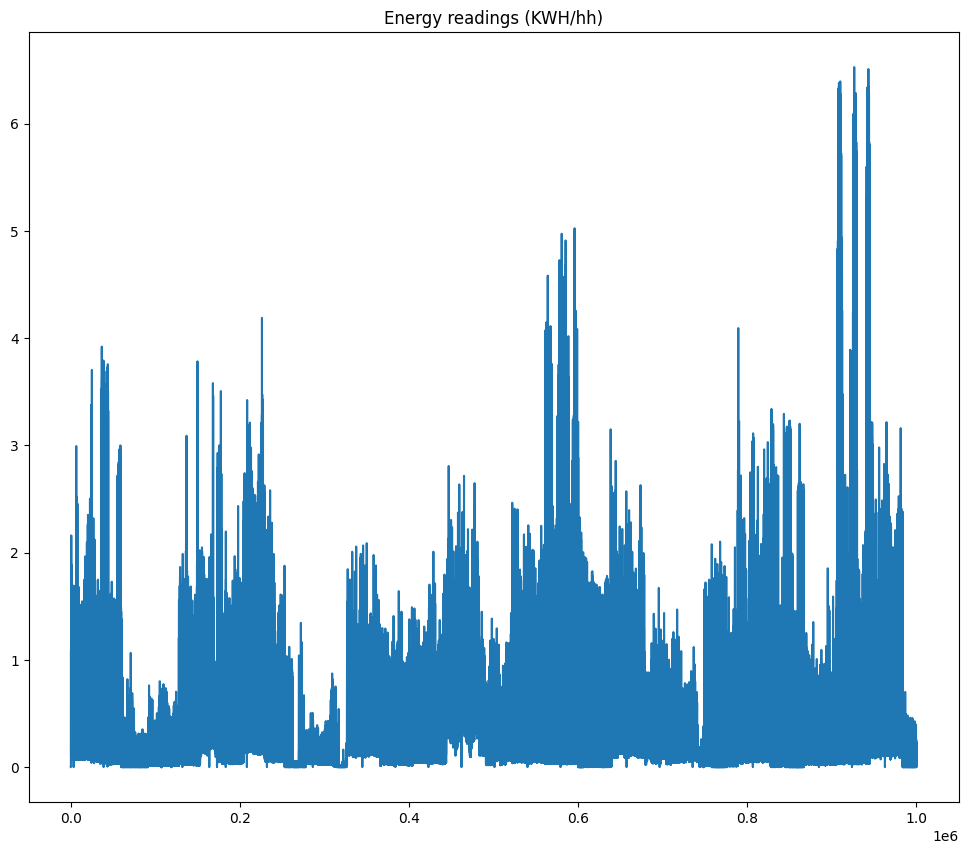

In [41]:
energy_data["KWH/hh (per half hour) "].plot(title="Energy readings (KWH/hh)", figsize=(12,10))

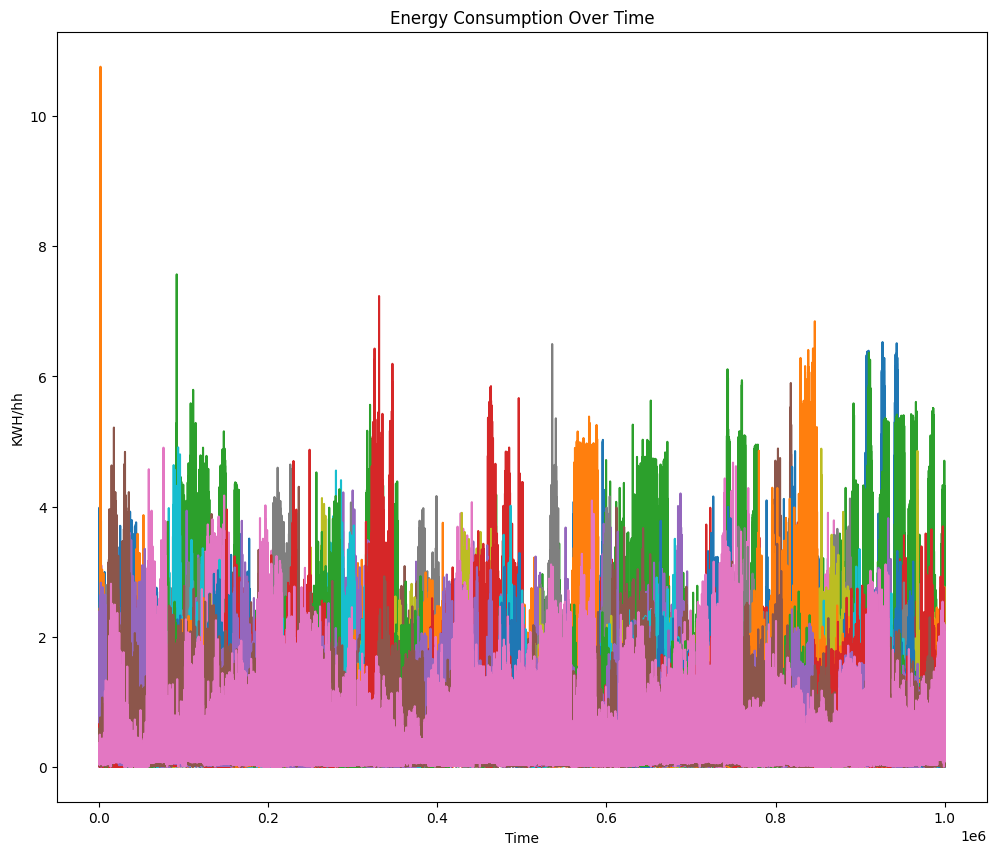

In [44]:
fig, ax = plt.subplots(figsize=(12, 10))

for idx, f in enumerate(os.listdir('./split_data')):
    if idx % 10 == 0:  
        file_path = os.path.join('./split_data', f) 
        temp = pd.read_csv(file_path)
        
        temp.replace("Null", 0, inplace=True)
        
        column_name = "KWH/hh (per half hour) "
        if column_name in temp.columns:
            temp[column_name] = temp[column_name].astype(float)
            ax.plot(temp[column_name], label=f)  

ax.set_title("Energy Consumption Over Time")
ax.set_xlabel("Time")
ax.set_ylabel("KWH/hh")
#ax.legend()

plt.savefig('./energy.png')
plt.show()

# Weather

In [49]:
weather_data = pd.read_csv('./weather_hourly_darksky.csv')
print(f"shape: {weather_data.shape}")
weather_data.head()

shape: (21165, 12)


,visibility,windBearing,temperature,time,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary
0,5.97,104,10.24,2011-11-11 00:00:00,8.86,1016.76,10.24,2.77,rain,partly-cloudy-night,0.91,Partly Cloudy
1,4.88,99,9.76,2011-11-11 01:00:00,8.83,1016.63,8.24,2.95,rain,partly-cloudy-night,0.94,Partly Cloudy
2,3.70,98,9.46,2011-11-11 02:00:00,8.79,1016.36,7.76,3.17,rain,partly-cloudy-night,0.96,Partly Cloudy
3,3.12,99,9.23,2011-11-11 03:00:00,8.63,1016.28,7.44,3.25,rain,fog,0.96,Foggy
4,1.85,111,9.26,2011-11-11 04:00:00,9.21,1015.98,7.24,3.70,rain,fog,1.00,Foggy


In [78]:
weather_data.time.min(), weather_data.time.max()

('2011-11-01 00:00:00', '2014-03-31 22:00:00')

In [50]:
weather_data.isna().sum()

visibility              0
windBearing             0
temperature             0
time                    0
dewPoint                0
pressure               13
apparentTemperature     0
windSpeed               0
precipType              0
icon                    0
humidity                0
summary                 0
dtype: int64

In [53]:
weather_data.icon.value_counts(), weather_data.summary.value_counts()

(icon
 partly-cloudy-day      7658
 partly-cloudy-night    5075
 clear-night            4661
 clear-day              1110
 wind                    989
 cloudy                  979
 fog                     693
 Name: count, dtype: int64,
 summary
 Partly Cloudy               6638
 Mostly Cloudy               6095
 Clear                       5771
 Overcast                     979
 Foggy                        693
 Breezy and Mostly Cloudy     385
 Breezy and Partly Cloudy     267
 Breezy                       195
 Breezy and Overcast           83
 Windy and Mostly Cloudy       29
 Windy                         18
 Windy and Overcast             9
 Windy and Partly Cloudy        3
 Name: count, dtype: int64)

<Axes: xlabel='summary'>

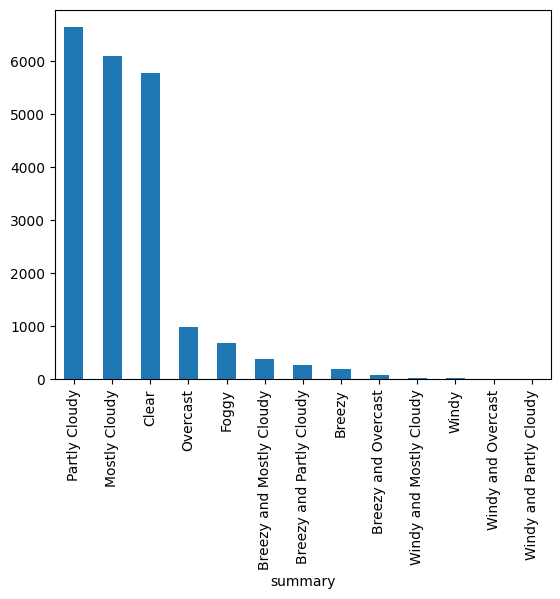

In [56]:
weather_data.summary.value_counts().plot(kind="bar")

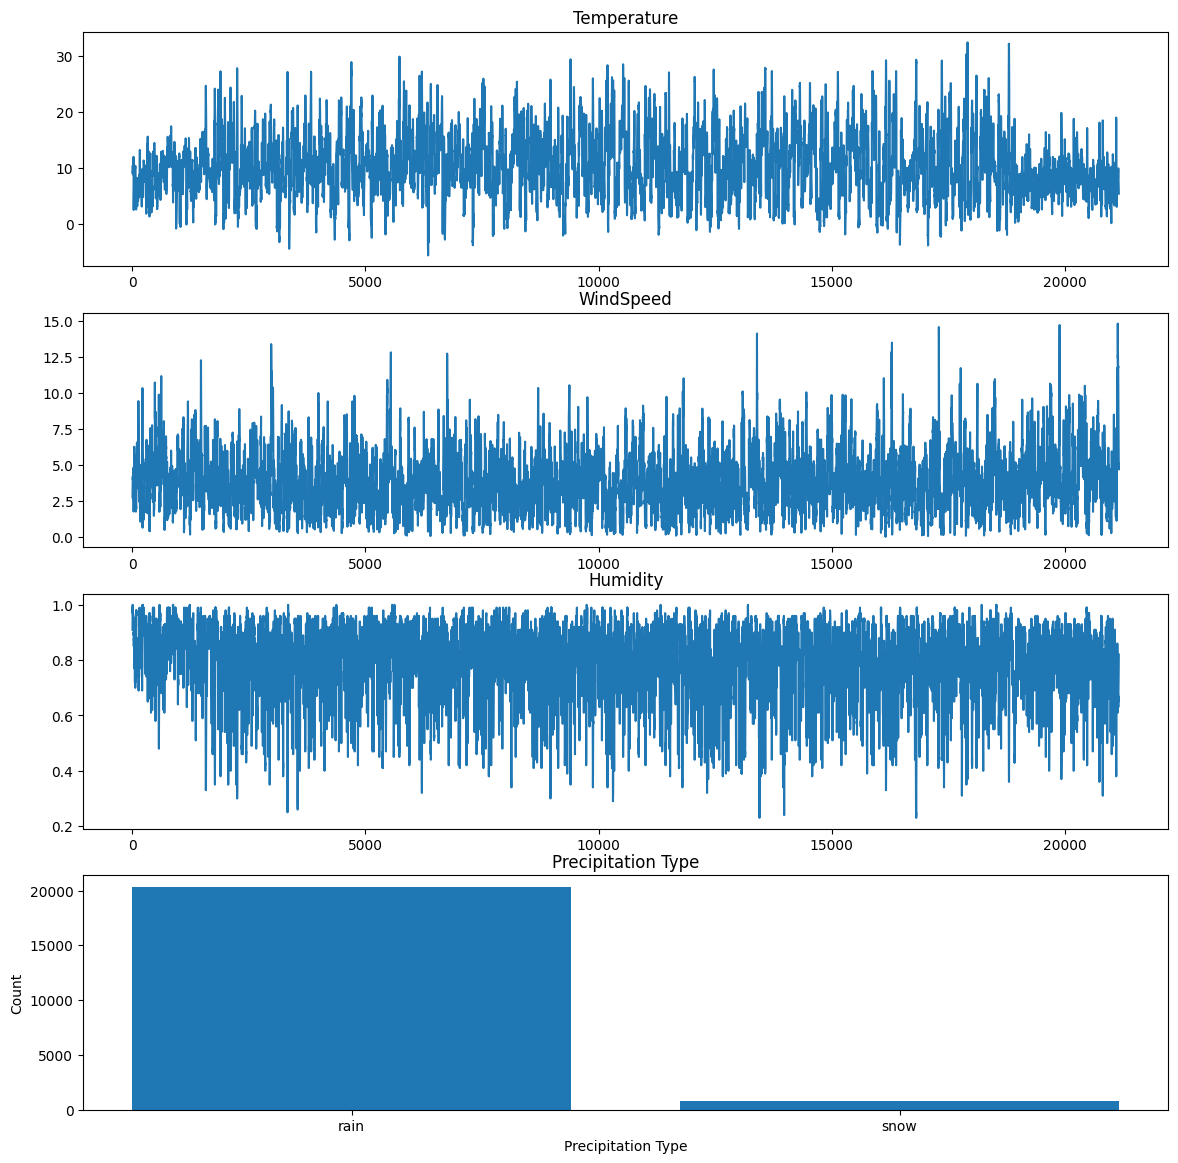

In [63]:
fig, axes = plt.subplots(nrows=4, figsize=(14,14))
axes = axes.flatten()

axes[0].plot(weather_data.temperature)
axes[0].set_title("Temperature")

axes[1].plot(weather_data.windSpeed)
axes[1].set_title("WindSpeed")

axes[2].plot(weather_data.humidity)
axes[2].set_title("Humidity")

axes[3].bar(weather_data.precipType.value_counts().index, weather_data.precipType.value_counts().values)
axes[3].set_title("Precipitation Type")
axes[3].set_xlabel("Precipitation Type")
axes[3].set_ylabel("Count")

plt.savefig('./weather_london.png')

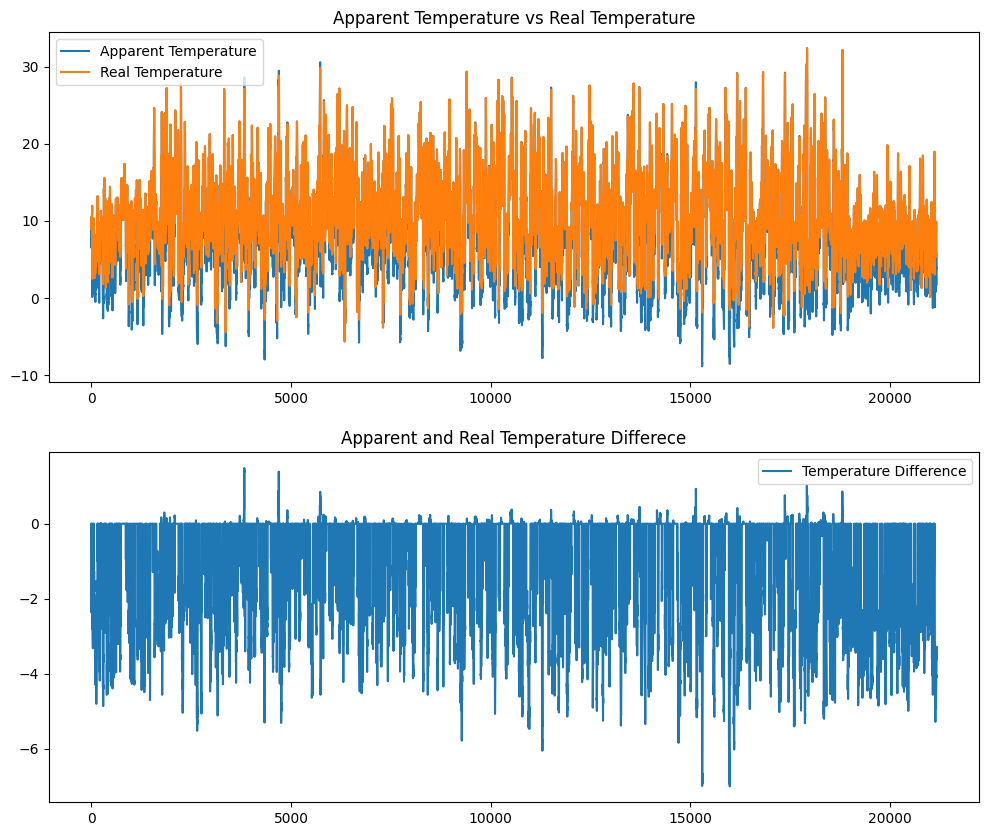

In [76]:
fig, axes = plt.subplots(nrows=2, figsize=(12,10))
weather_data["tempDiff"] = weather_data["apparentTemperature"] - weather_data["temperature"]

axes[0].plot(weather_data["apparentTemperature"], label="Apparent Temperature")
axes[0].plot(weather_data["temperature"], label="Real Temperature")
axes[0].set_title("Apparent Temperature vs Real Temperature")
axes[0].legend(loc="best")


axes[1].plot(weather_data["tempDiff"], label="Temperature Difference")
axes[1].set_title("Apparent and Real Temperature Differece")
axes[1].legend(loc="best")

plt.savefig('./temp_diff.png')
plt.show()

In [77]:
weather_data["tempDiff"].mean()

-1.2411481218993623